In [ ]:
#installing the required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
#uploading data set 
df = pd.read_csv('./anthems.csv')
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


Step 1: Check for Missing value and outlier and plots 

In [26]:
df.isna().sum()

Country      0
Alpha-2      1
Alpha-3      0
Continent    0
Anthem       0
dtype: int64

In [28]:
df[df.isnull().any(axis=1)]

,Country,Alpha-2,Alpha-3,Continent,Anthem
168,Namibia,NaN,NAM,Africa,Namibia land of the brave Freedom fight we he ...


After checking the data , we can see the missing values in the data set in "Alpha-2" column. The column "Alpha-2" is the 2-digits country code  based on the ISO 3166-1 standard. I will fill the first 2-digit of the country.

In [32]:
df= df.fillna('NA') #country "Namibia"
df.isnull().sum()

Country      0
Alpha-2      0
Alpha-3      0
Continent    0
Anthem       0
dtype: int64

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayenyeinsan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayenyeinsan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


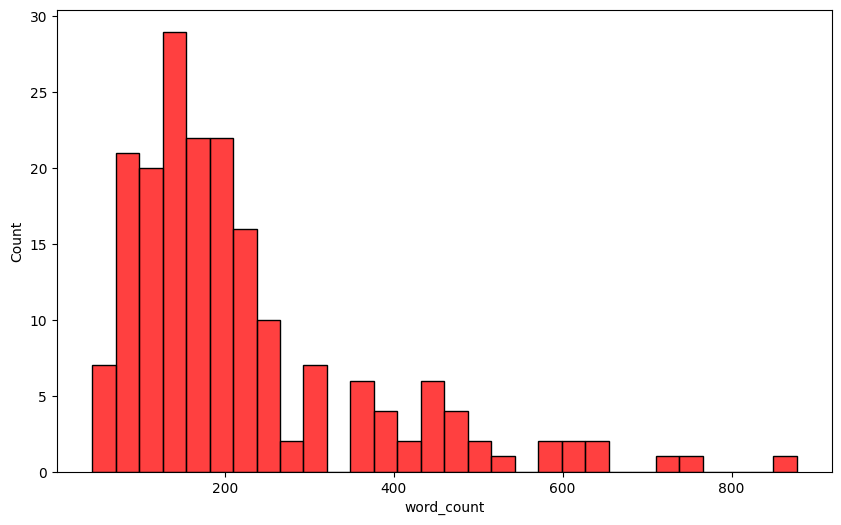

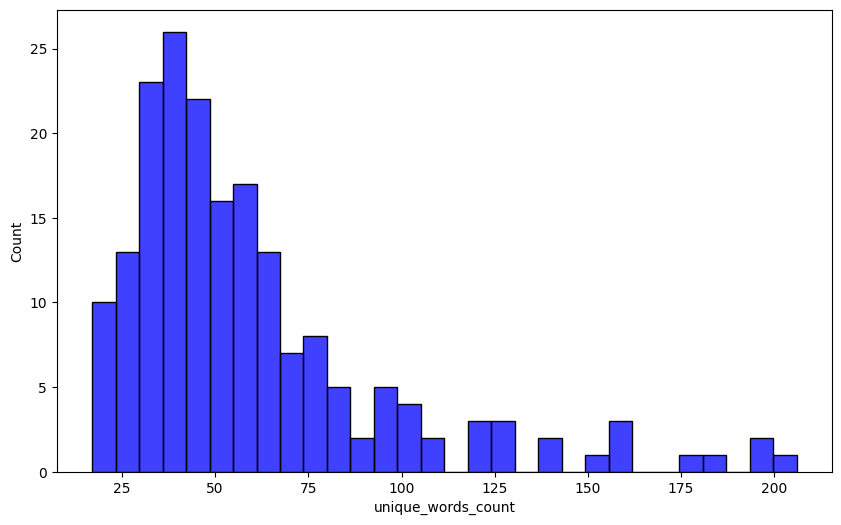

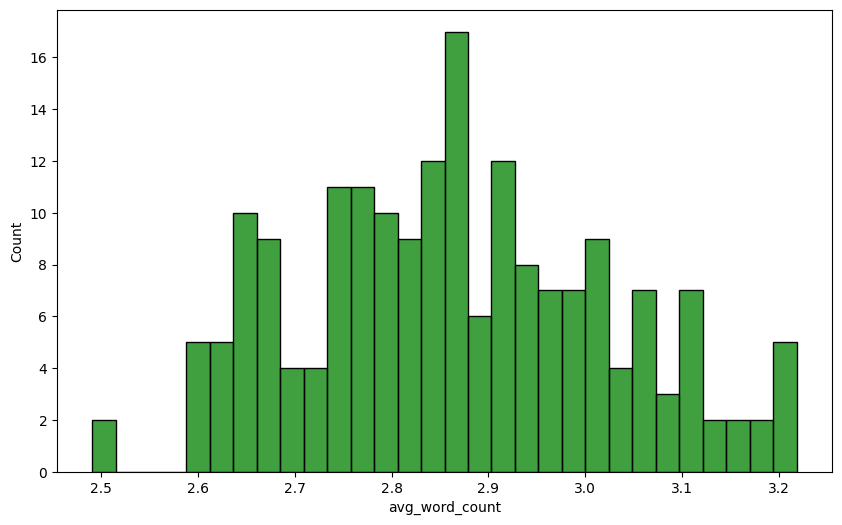

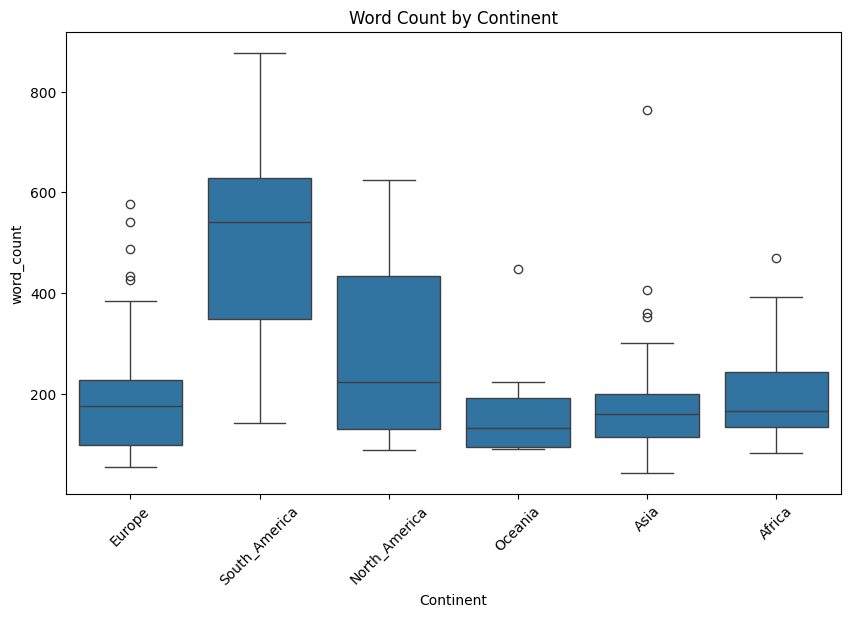

In [82]:
#data cleaning and preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]
    return filtered_text

def text_analysis(text):
    word_tokens = word_tokenize(text)
    return {
        'word_count':len(word_tokens),
        'unique_words_count': len(set(word_tokens)),
        'avg_word_count':np.mean([len(word) for word in word_tokens])
    }

df['processed_text'] = df['Anthem'].apply(remove_stopwords)
df['word_count']= df['processed_text'].apply(lambda x: len(word_tokenize(str(x))))
df['unique_words_count']= df['processed_text'].apply(lambda x: len(set(word_tokenize(str(x)))))
df['avg_word_count']= df['processed_text'].apply(lambda x : np.mean([len(word) for word in word_tokenize(str(x))]))
df.head()

#plotting the data

plt.figure(figsize=(10,6))
sns.histplot(df['word_count'], bins=30, color='red')

plt.figure(figsize=(10,6))
sns.histplot(df['unique_words_count'], bins=30, color='blue')

plt.figure(figsize=(10,6))
sns.histplot(df['avg_word_count'], bins=30, color='green')

#word count by continent
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Continent'], y=df['word_count'])
plt.xticks(rotation=45)
plt.title("Word Count by Continent")
plt.show()





In [75]:
#Outlier detection Using IQR

def Outlier_detection(data, feature):
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

#outliers in word count
word_count_outliers = Outlier_detection(df, 'word_count')
#outliers in unique words count
unique_words_count_outliers = Outlier_detection(df, 'unique_words_count')
#outliers in average word count
common_words = Counter(word for words in df['processed_text'] for word in words ).most_common(10)
print("Most common words in the dataset: \n")
common_words = dict(common_words)
common_words



Most common words in the dataset: 



{'us': 249,
 'land': 204,
 'may': 153,
 'let': 135,
 'god': 133,
 'people': 113,
 'thy': 105,
 'free': 104,
 'one': 96,
 'shall': 93}